In [1]:
import pandas as pd
reviews_data = pd.read_csv("/content/Reviews_dataset.csv")
reviews_data = reviews_data.iloc[:,1]

In [14]:
import spacy
import itertools

nlp = spacy.load("en_core_web_sm")
all_stopwords = nlp.Defaults.stop_words
allowed_types = ["NOUN", "ADJ", "VERB", "ADV"]

def lemmarization(x):
    doc = nlp(x)
    a = [[token.lemma_ for token in doc if (token.pos_ in allowed_types)], [chunk.text for chunk in doc.noun_chunks]]
    a = list(itertools.chain(*a))
    a = [i for i in a if i not in all_stopwords]
    a = [i for i in a if i not in ["I", "We", "They", "You", "It", "The", "the", "Food", "food"]]
    return a

lemmatized_texts = [lemmarization(text) for text in reviews_data]

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [9]:
# Create a dataframe to store
df = pd.DataFrame({'lemmatized_text': lemmatized_texts})
df['lemmatized_str'] = [' '.join(map(str, l)) for l in df['lemmatized_text']]
df['lemmatized_text'] = df['lemmatized_str']

# Gather sentiment of the textual review
from textblob import TextBlob

df['sentiment'] = df['lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()

,lemmatized_text,lemmatized_str,sentiment
0,service good lover breakfast tiffin lovely cof...,service good lover breakfast tiffin lovely cof...,0.345833
1,good lover breakfast tiffin lovely coffee impo...,good lover breakfast tiffin lovely coffee impo...,0.268182
2,famous restaurant offer wide variety south nor...,famous restaurant offer wide variety south nor...,0.405000
3,variety sweet taste sweet awesome good service...,variety sweet taste sweet awesome good service...,0.662500
4,word irish friend long live visit include exce...,word irish friend long live visit include exce...,0.424646


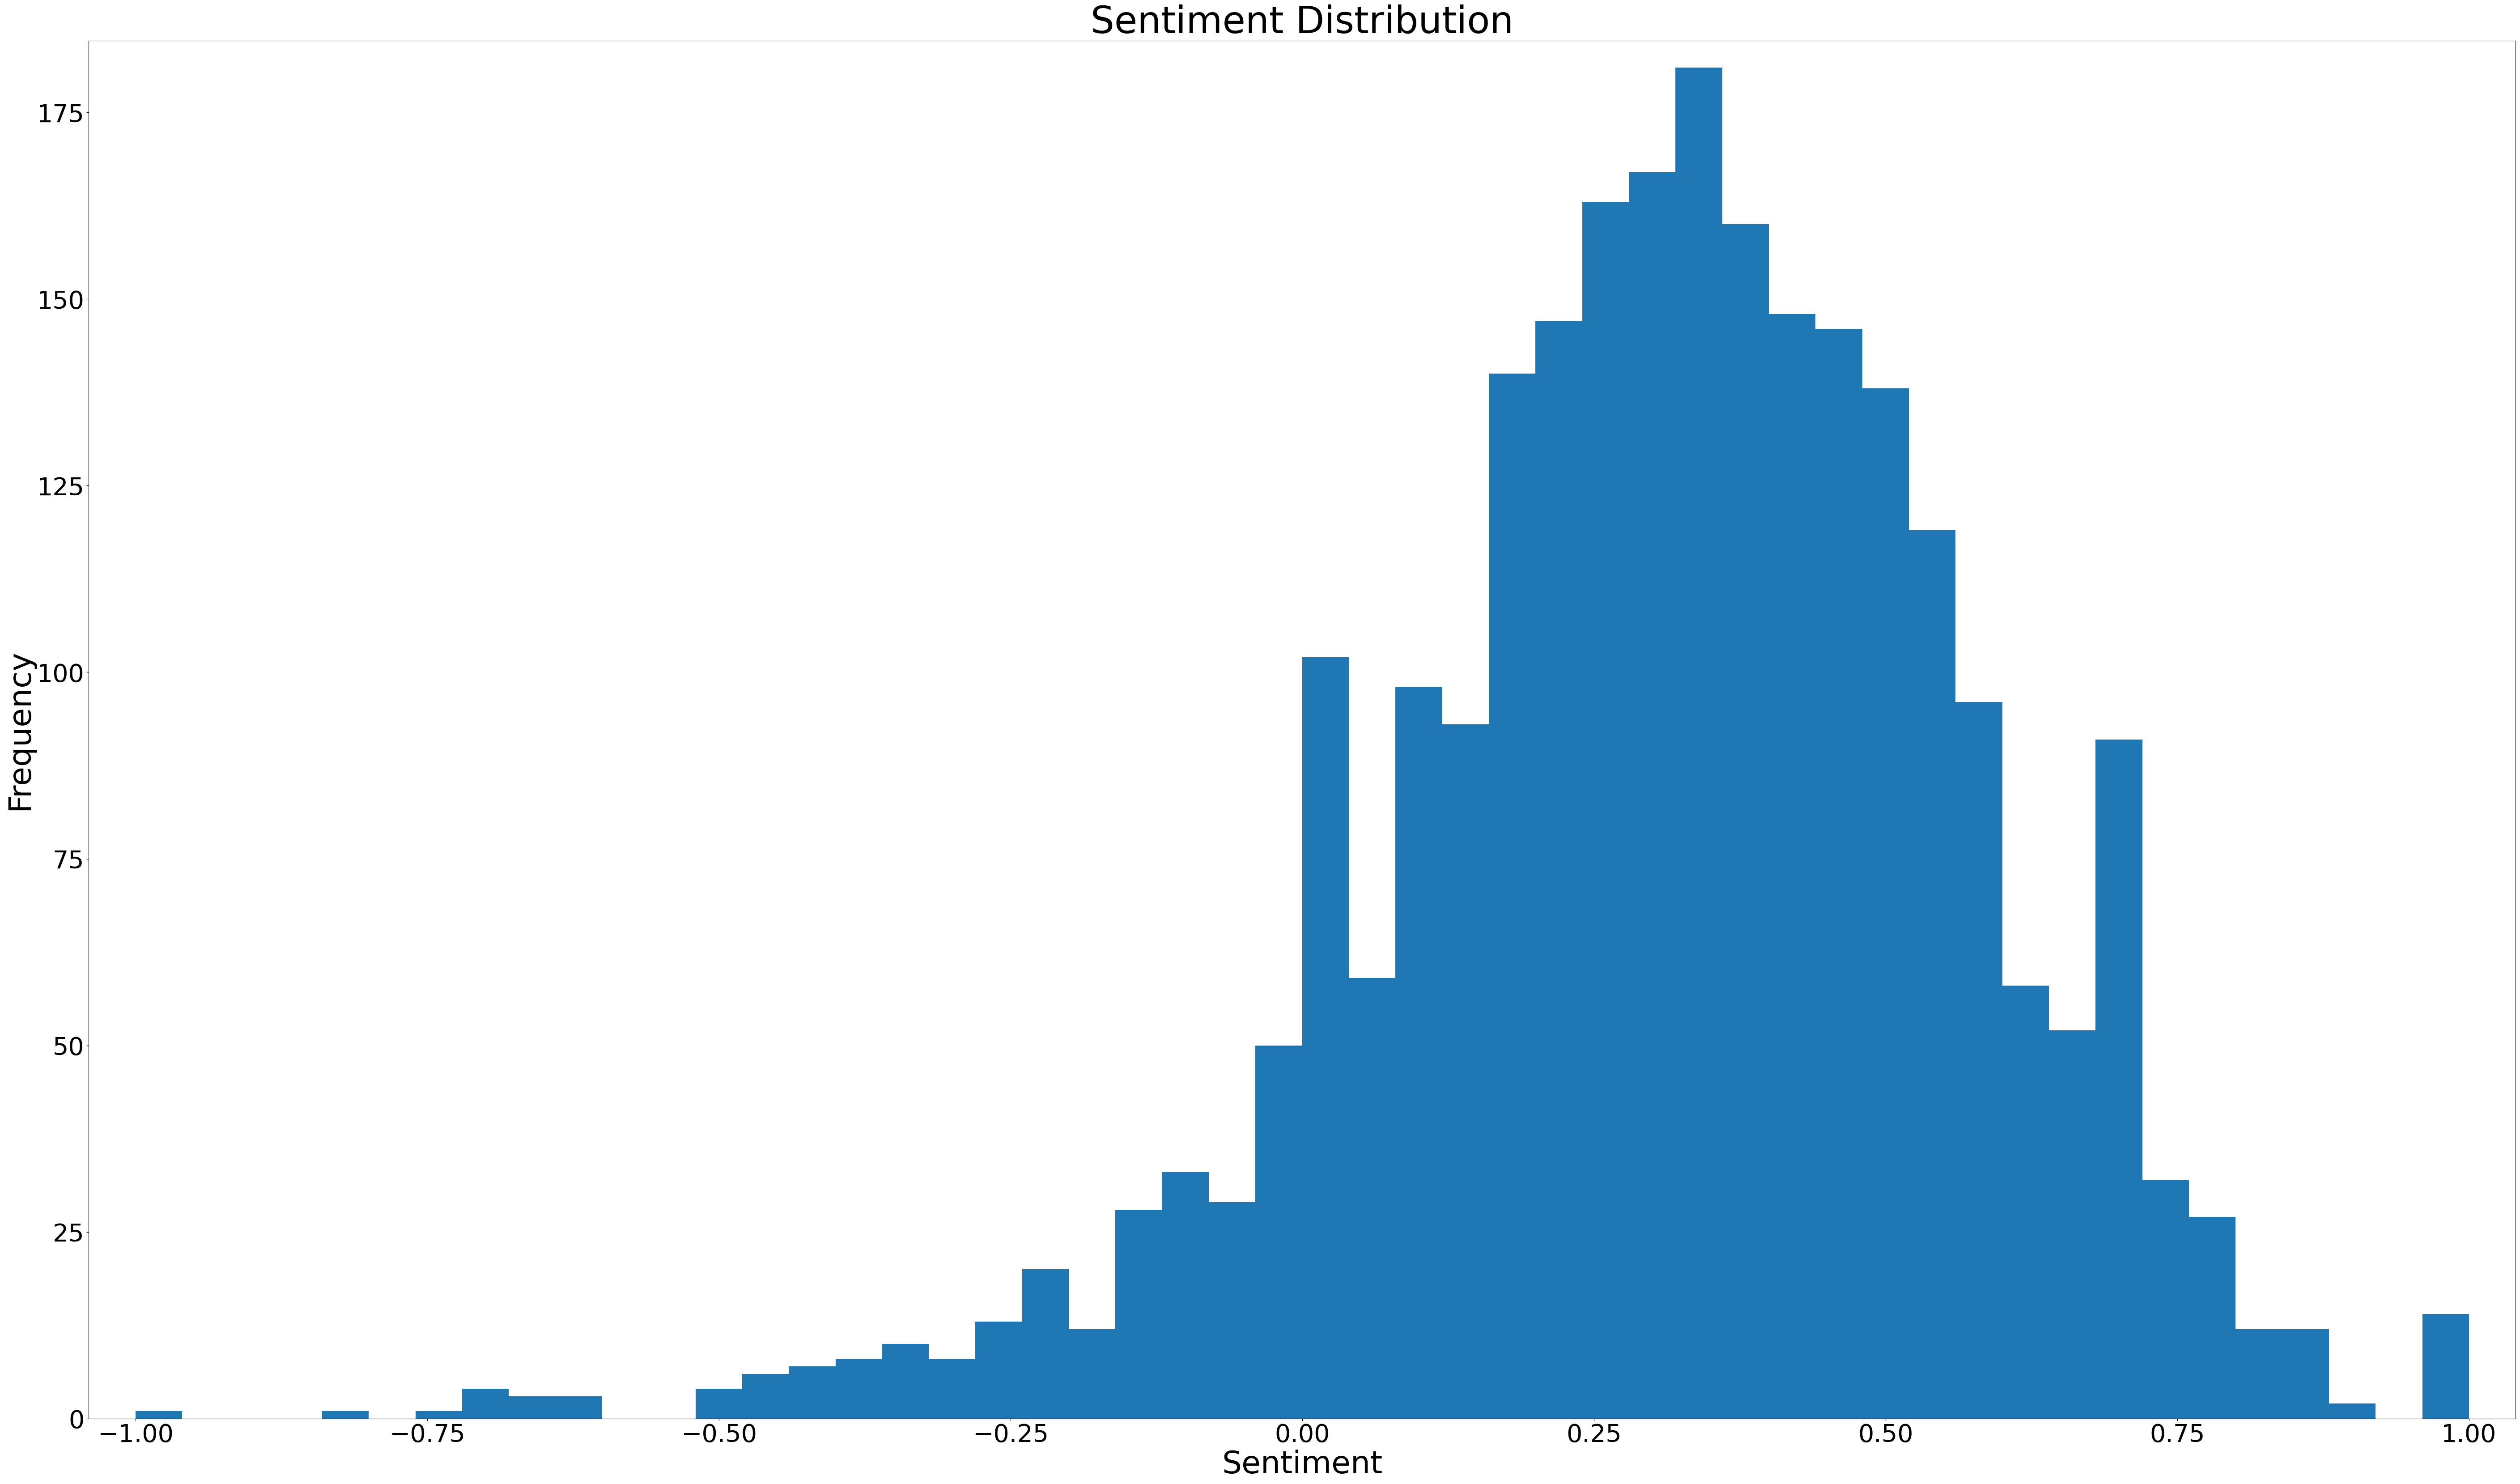

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(70, 40))
plt.margins(0.02)

plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)

plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)

plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)


plt.show()

<Axes: >

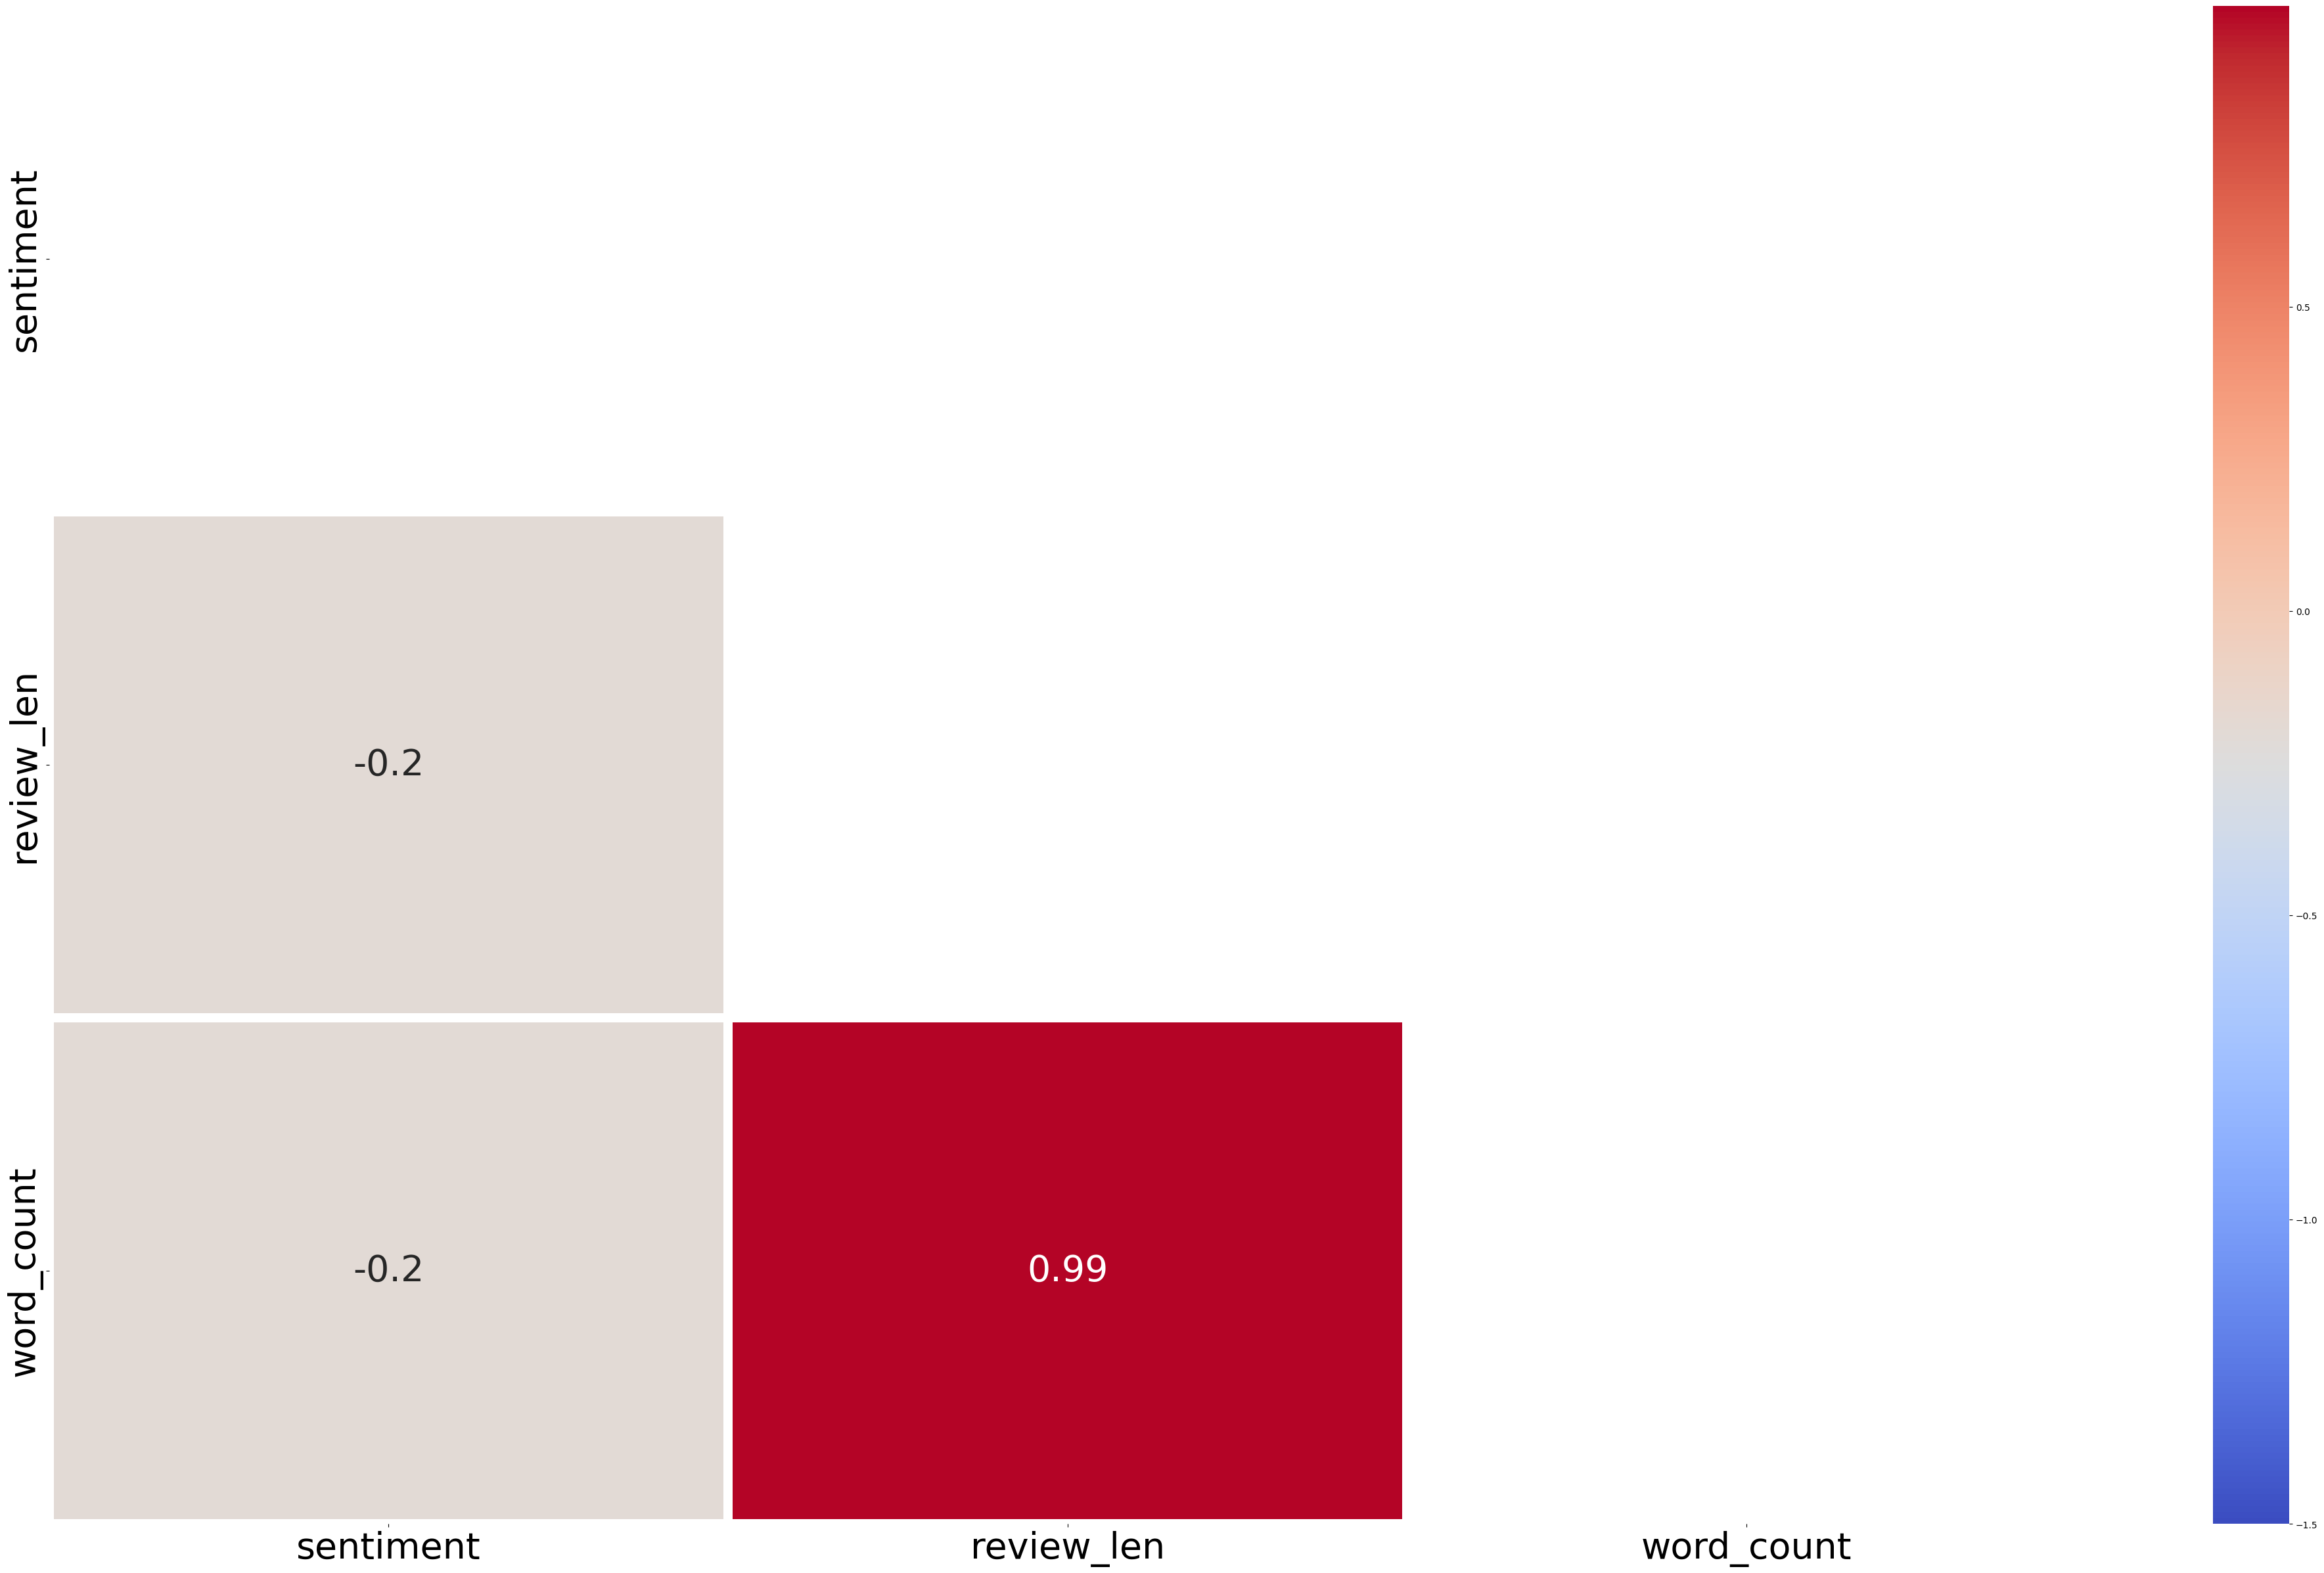

In [11]:
# Check relation between review length, word count and sentiment
df['word_count'] = df['lemmatized_text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemmatized_str'].astype(str).apply(len)

import numpy as np
correlation = df[['sentiment', 'review_len', 'word_count']].corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)


In [12]:
from nltk.probability import FreqDist

words = df['lemmatized_text']
allwords = []

for wordlist in words:
    for word in wordlist:
        allwords.append(word)

mostcommon = FreqDist(allwords).most_common(100)
from nltk.probability import FreqDist

# Assuming 'lemmatized_text' contains either lists of words or strings
words = df['lemmatized_text']

allwords = []
for wordlist in words:
    if isinstance(wordlist, str):  # Check if the wordlist is a string
        wordlist = wordlist.split()  # Split string into words
    allwords.extend(wordlist)  # Add the words to allwords list

# Get the 100 most common words
mostcommon = FreqDist(allwords).most_common(100)

print(mostcommon)

[('the', 4297), ('good', 2831), ('place', 2156), ('a', 2044), ('restaurant', 1706), ('service', 1684), ('food', 1497), ('indian', 1248), ('The', 1141), ('taste', 1065), ('quality', 930), ('sweet', 896), ('south', 844), ('Indian', 739), ('time', 737), ('variety', 627), ('lunch', 626), ('coffee', 599), ('this', 586), ('visit', 573), ('A2B', 555), ('sweets', 546), ('serve', 535), ('hotel', 531), ('vegetarian', 514), ('meal', 503), ('price', 497), ('breakfast', 488), ('tasty', 474), ('order', 474), ('staff', 463), ('dosa', 436), ('item', 418), ('snack', 396), ('parking', 395), ('South', 395), ('table', 393), ('dinner', 388), ('their', 386), ('veg', 383), ('nice', 371), ('and', 359), ('dish', 355), ('family', 354), ('This', 349), ('great', 344), ('try', 337), ('crowd', 333), ('clean', 325), ('items', 323), ('self', 313), ('quick', 307), ('north', 306), ('all', 305), ('people', 299), ('snacks', 298), ('available', 297), ('my', 296), ('eat', 291), ('experience', 285), ('wait', 267), ('other',

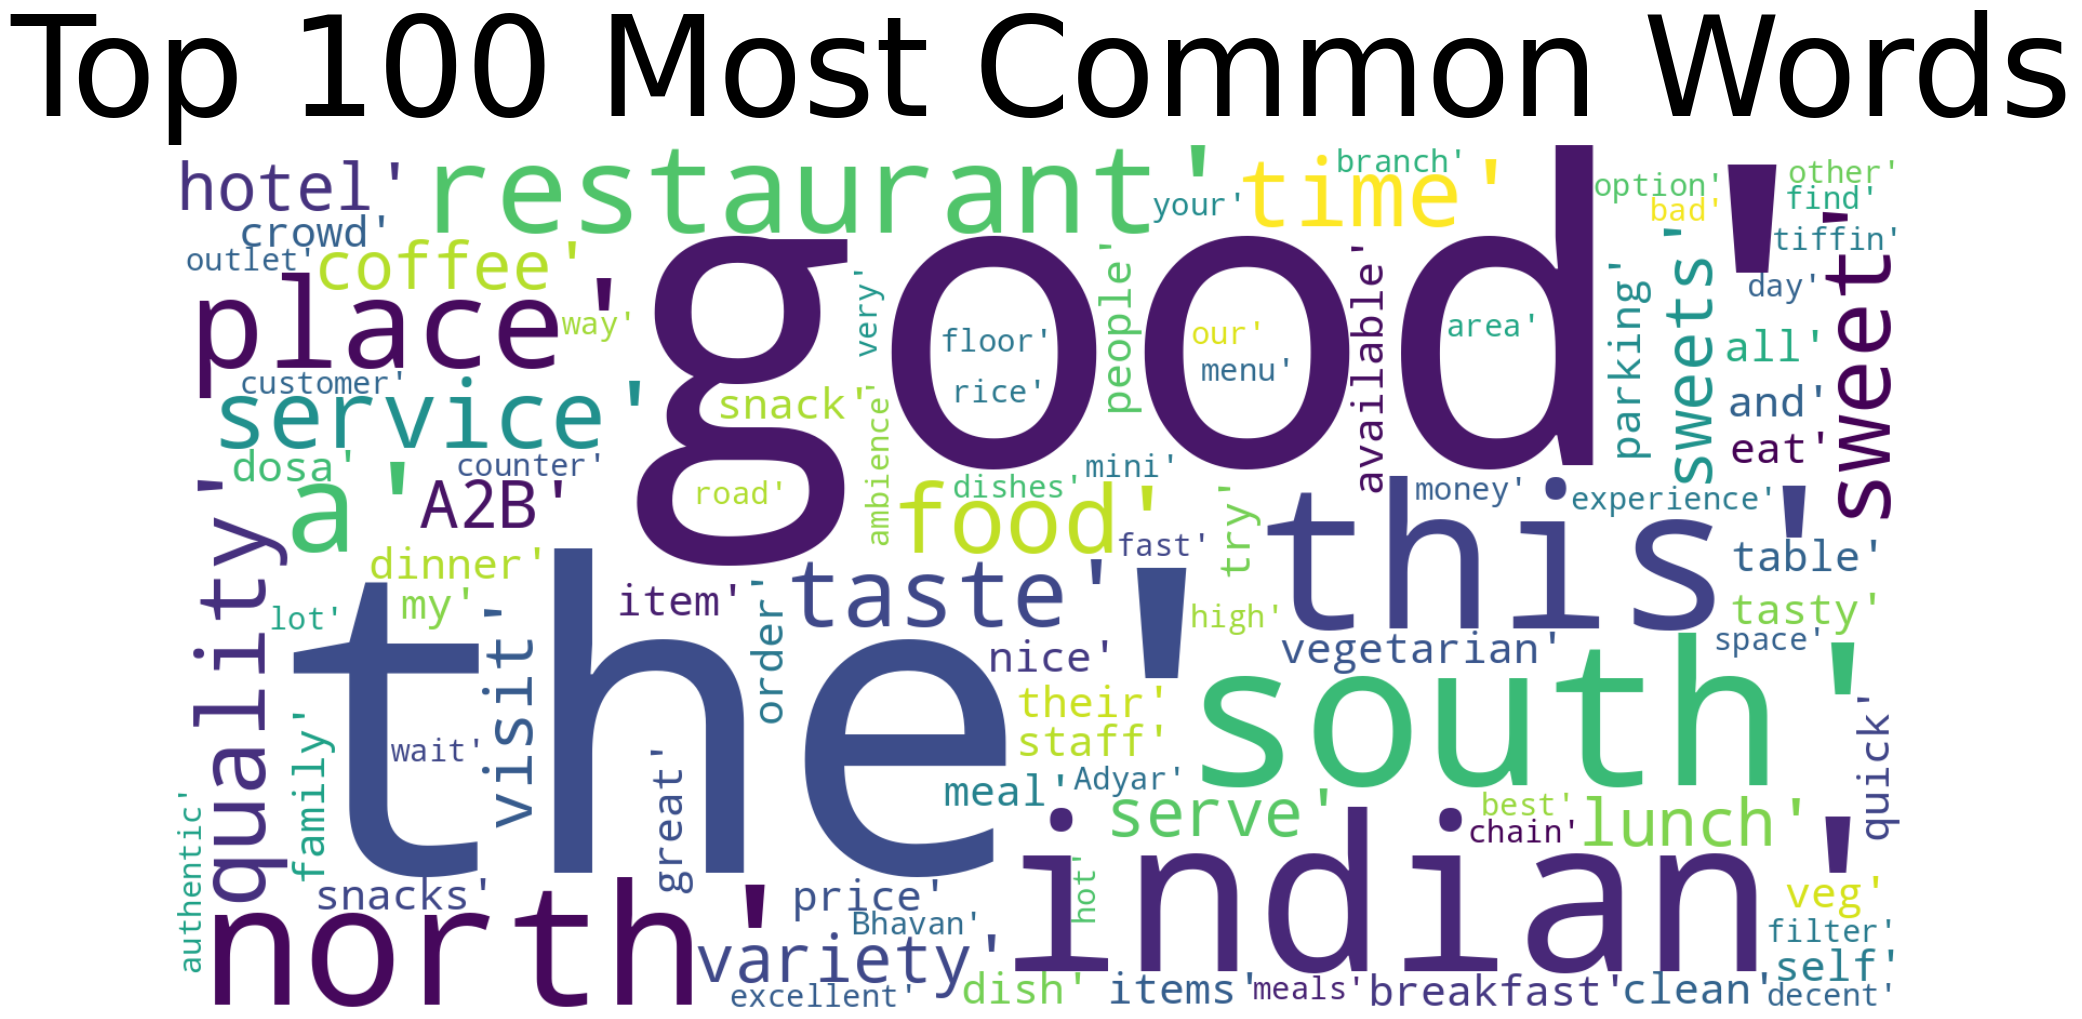

In [15]:
from wordcloud import WordCloud

wordcloud2 = WordCloud(width=1600, height=800, background_color="white").generate(str(mostcommon))

fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')

plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)

plt.show()

In [16]:
# prompt: number of positive reviews , number of neutral review , number of negative review

positive_reviews = df[df['sentiment'] > 0].shape[0]
neutral_reviews = df[df['sentiment'] == 0].shape[0]
negative_reviews = df[df['sentiment'] < 0].shape[0]

print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of neutral reviews: {neutral_reviews}")
print(f"Number of negative reviews: {negative_reviews}")


Number of positive reviews: 2213
Number of neutral reviews: 44
Number of negative reviews: 241
